In [2]:
pip install scikit-learn

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
from sklearn.preprocessing import label_binarize

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Create a Naive Bayes classifier (GaussianNB)
nb = GaussianNB()

# Create a KFold object for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize empty lists to store various metrics
confusion_matrices = []
roc_curves = []
precision_recall_curves = []
classification_reports = []

# Binarize the target variable (one-vs-all format) for three classes
y_bin = label_binarize(y, classes=[0, 1, 2])

# Perform cross-validation and get predicted labels
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_bin[train_index], y_bin[test_index]

    nb.fit(X_train, np.argmax(y_train, axis=1))  # Ensure y_train is a 1D array
    y_score = nb.predict_proba(X_test)

    # Calculate ROC curves and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for class_idx in range(y_bin.shape[1]):
        fpr[class_idx], tpr[class_idx], _ = roc_curve(y_test[:, class_idx], y_score[:, class_idx])
        roc_auc[class_idx] = auc(fpr[class_idx], tpr[class_idx])
        roc_curves.append((fpr[class_idx], tpr[class_idx]))

    precision, recall, _ = precision_recall_curve(y_test.ravel(), y_score.ravel())
    precision_recall_curves.append((precision, recall))

    report = classification_report(y_test, y_score > 0.5, target_names=data.target_names)
    classification_reports.append(report)

# Visualize the confusion matrices, ROC curves, and precision-recall curves
plt.figure(figsize=(18, 8))
for i, (cm, roc, prc, report) in enumerate(zip(confusion_matrices, roc_curves, precision_recall_curves, classification_reports), 1):
    plt.subplot(2, 5, i)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel('Predicted')  # Corrected this line
    plt.ylabel('True')
    plt.title(f'Fold {i} - Confusion Matrix')

    for class_idx, (fpr, tpr) in enumerate(roc):
        plt.subplot(2, 5, i + 5)
        plt.plot(fpr, tpr, lw=2, label=f'Class {class_idx} (AUC = {roc_auc[class_idx]:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Fold {i} - ROC Curves')
        plt.legend(loc="lower right")

# Display classification reports
for i, report in enumerate(classification_reports, 1):
    print(f'Classification Report for Fold {i}:')
    print(report)

plt.tight_layout()
plt.show()


Classification Report for Fold 1:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30

Classification Report for Fold 2:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.86      0.92         7

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30
 samples avg       0.97      0.97      0.97        30

Classification Report for Fold 3:
              precision    r

<Figure size 1800x800 with 0 Axes>

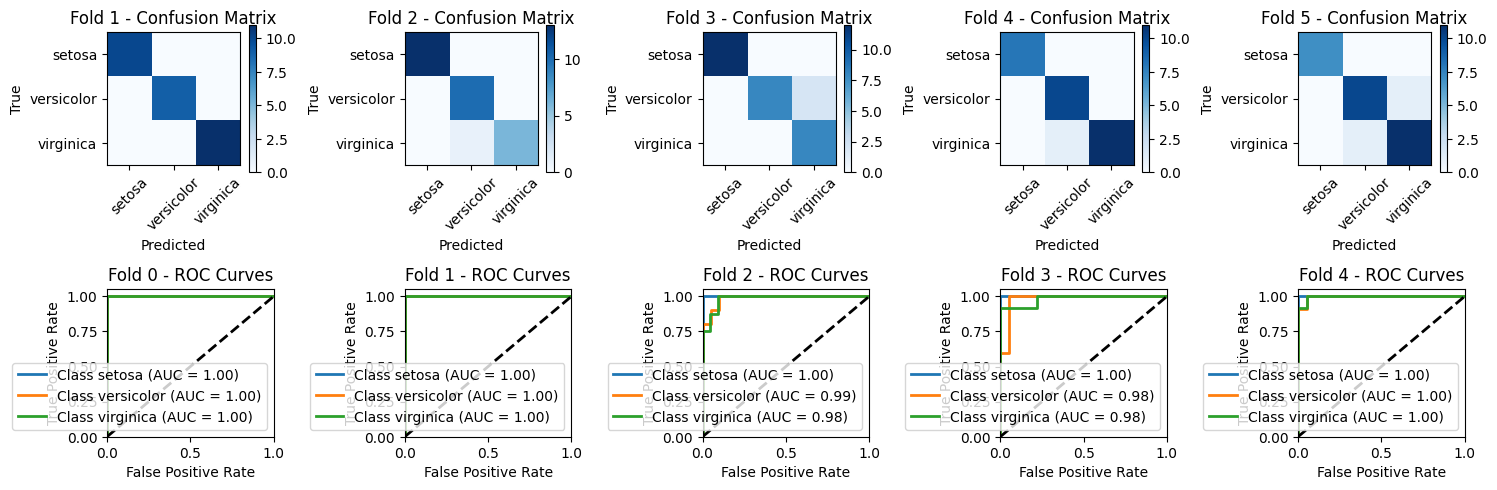

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import KFold

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Create a Naive Bayes classifier (GaussianNB)
nb = GaussianNB()

# Create a KFold object for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize empty lists to store various metrics
confusion_matrices = []
roc_curves = []

# Perform cross-validation and get predicted labels
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    y_pred = nb.fit(X_train, y_train).predict(X_test)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

    y_bin = label_binarize(y_test, classes=[0, 1, 2])
    y_score = nb.predict_proba(X_test)

    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    roc_curves.append((fpr, tpr, roc_auc))

# Visualize the confusion matrices
plt.figure(figsize=(15, 5))
for i, cm in enumerate(confusion_matrices, 1):
    plt.subplot(2, 5, i)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Fold {i} - Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(data.target_names))
    plt.xticks(tick_marks, data.target_names, rotation=45)
    plt.yticks(tick_marks, data.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')

# Visualize the ROC curves
for i, (fpr_dict, tpr_dict, roc_auc_dict) in enumerate(roc_curves, 6):
    plt.subplot(2, 5, i)
    for class_idx in range(3):
        plt.plot(fpr_dict[class_idx], tpr_dict[class_idx], lw=2, label=f'Class {data.target_names[class_idx]} (AUC = {roc_auc_dict[class_idx]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Fold {i - 6} - ROC Curves')
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib_venn import venn2  # Add this import


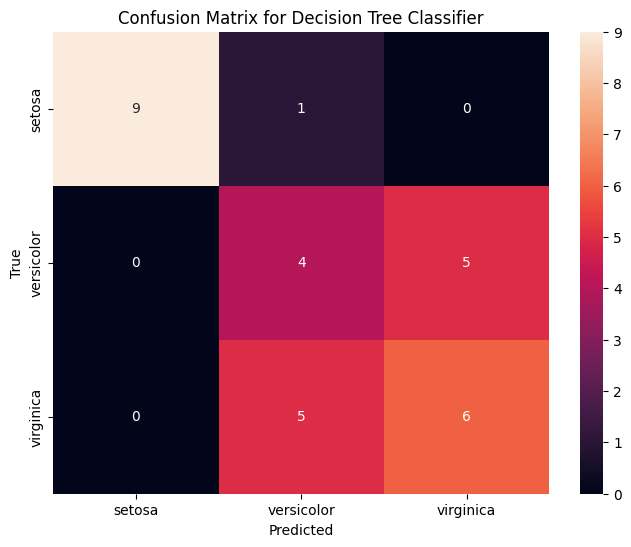

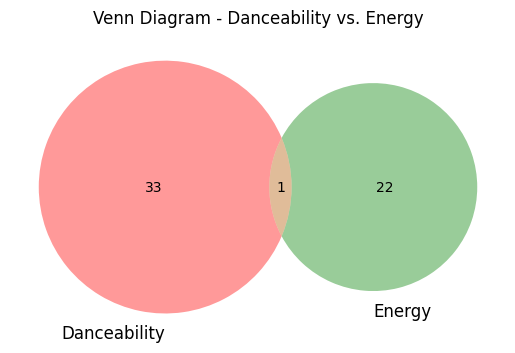

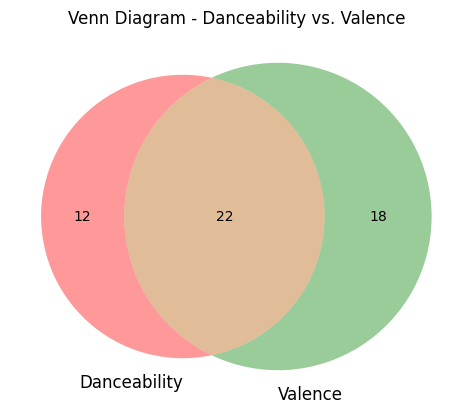

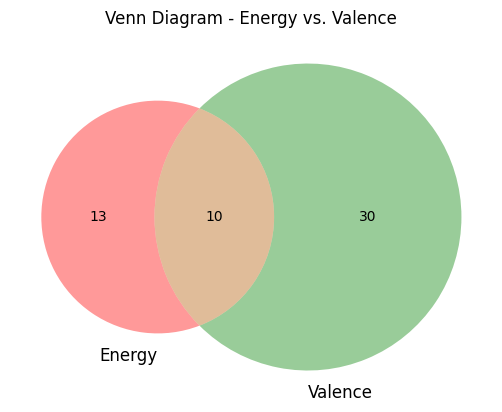

In [23]:
# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train[:, :2], y_train)  # Use only the first 2 features for 2D visualization
y_pred = dtc.predict(X_test[:, :2])  # Use only the first 2 features for prediction

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Now, let's create Venn diagrams for "danceability," "energy," and "valence"
danceability_set = set(X_train[:, 0])  # Replace with the actual attribute from your dataset
energy_set = set(X_train[:, 1])  # Replace with the actual attribute from your dataset
valence_set = set(X_train[:, 2])  # Replace with the actual attribute from your dataset

venn2([danceability_set, energy_set], ('Danceability', 'Energy'))
plt.title("Venn Diagram - Danceability vs. Energy")
plt.show()

venn2([danceability_set, valence_set], ('Danceability', 'Valence'))
plt.title("Venn Diagram - Danceability vs. Valence")
plt.show()

venn2([energy_set, valence_set], ('Energy', 'Valence'))
plt.title("Venn Diagram - Energy vs. Valence")
plt.show()


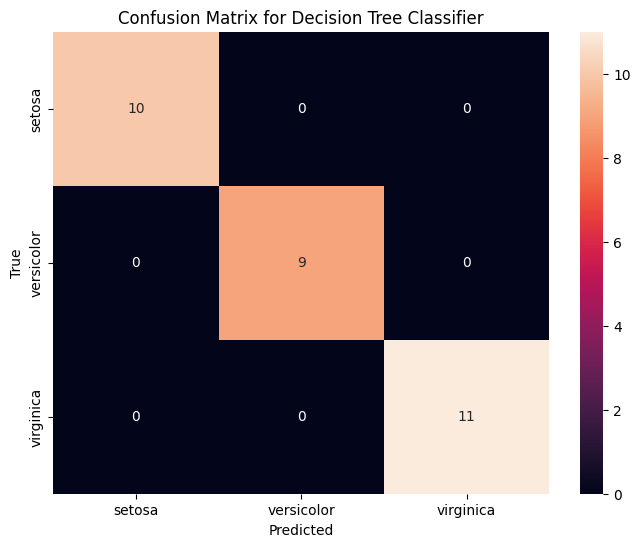

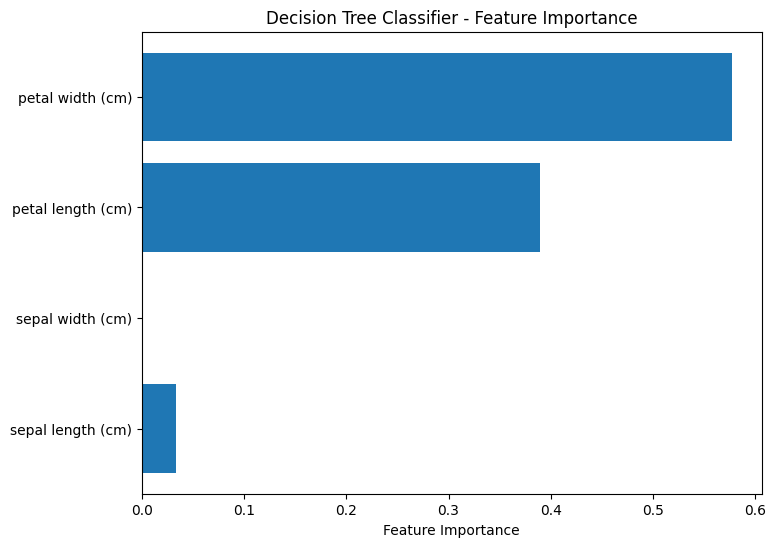

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib_venn import venn2

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)  # Train on all features
y_pred = dtc.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Feature Importance Visualization
feature_importance = dtc.feature_importances_
feature_names = data.feature_names

plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Classifier - Feature Importance')
plt.show()

# Venn Diagrams and feature importance for specific features can also be added as previously demonstrated.
